In [2]:
! conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
# import seaborn as sns
import torch 

# 0. Tensor?
- A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [2]:
?torch.tensor 

In [3]:
# detach(), clone()

a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)
b = a.detach() # gradient 전파가 안되는 tensor 생성, 메모리 공유
c = a.clone() # 
print(a)
print(b)
print(c)
b[0][0] = 9
print(a)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], grad_fn=<CloneBackward>)
tensor([[9., 2.],
        [3., 4.]], requires_grad=True)


In [21]:
?torch.Tensor.to

In [4]:
d = b.clone().requires_grad_(True)
d

tensor([[9., 2.],
        [3., 4.]], requires_grad=True)

In [5]:
e = d.clone().detach()
e

tensor([[9., 2.],
        [3., 4.]])

In [6]:
# to(), gpu 사용하기

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = a.to(dtype=torch.int, device=device)
f[0][1] = 9
a, f, device

(tensor([[9., 2.],
         [3., 4.]], requires_grad=True),
 tensor([[9, 9],
         [3, 4]], device='cuda:0', dtype=torch.int32),
 device(type='cuda', index=0))

In [7]:
if torch.cuda.is_available():
    print('cuda index:', torch.cuda.current_device())
    print('gpu 개수:', torch.cuda.device_count())
    print('graphic name:', torch.cuda.get_device_name())

cuda index: 0
gpu 개수: 2
graphic name: GeForce RTX 2080


### 참고. tensor error 시 check point!
- data가 Tensor로 변환이 되는 data인가?
- 연산하고 있는 Tensor간 data type이 같은가?
- 연산시 CPU Tensor와 GPU Tensor를 같은 device로 통일했는가?

# 1. 텐서의 차원(rank)

- 0차원 -> 스칼라
- 1차원 -> 벡터
- 2차원 -> 2차원 행렬
- 3차원 -> 3차원 행렬
- n차원 -> 랭크 n 텐서

In [8]:
# 0차원 텐서
x = torch.tensor(2)
x, x.dim(), x.shape

(tensor(2), 0, torch.Size([]))

In [29]:
?torch.rand

In [9]:
# 1차원 텐서
x = torch.rand(2)
x, x.dim(), x.shape

(tensor([0.2719, 0.8799]), 1, torch.Size([2]))

In [10]:
# 2차원 텐서
x = torch.rand(2, 3)
x, x.dim(), x.shape

(tensor([[0.4811, 0.5441, 0.3113],
         [0.5275, 0.9717, 0.3157]]),
 2,
 torch.Size([2, 3]))

In [11]:
# 3차원 텐서
x = torch.rand(3, 2, 5)
x, x.dim(), x.shape

(tensor([[[0.2590, 0.3681, 0.8568, 0.8307, 0.6206],
          [0.7033, 0.0686, 0.5985, 0.9812, 0.6110]],
 
         [[0.0805, 0.2762, 0.6933, 0.6663, 0.8971],
          [0.9261, 0.6642, 0.1844, 0.0121, 0.5678]],
 
         [[0.7267, 0.8675, 0.8133, 0.9285, 0.4279],
          [0.7349, 0.7899, 0.0906, 0.5563, 0.0478]]]),
 3,
 torch.Size([3, 2, 5]))

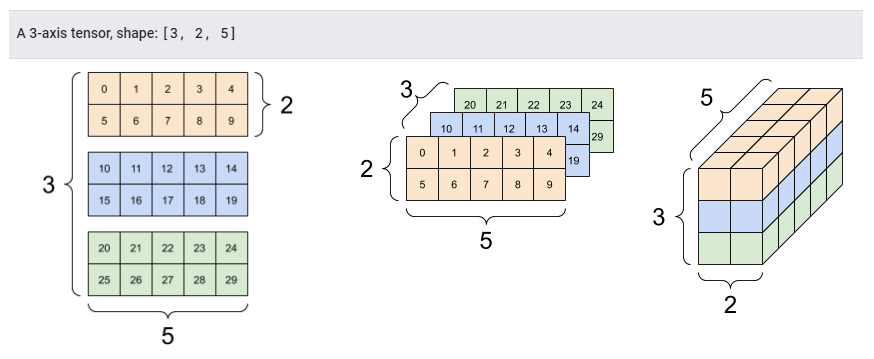

In [12]:
# 4차원 텐서 -> vision분야에서 주로 사용
x = torch.rand(128, 3, 32, 32) # batch-size, channel, height, width
x.dim(), x.shape

(4, torch.Size([128, 3, 32, 32]))

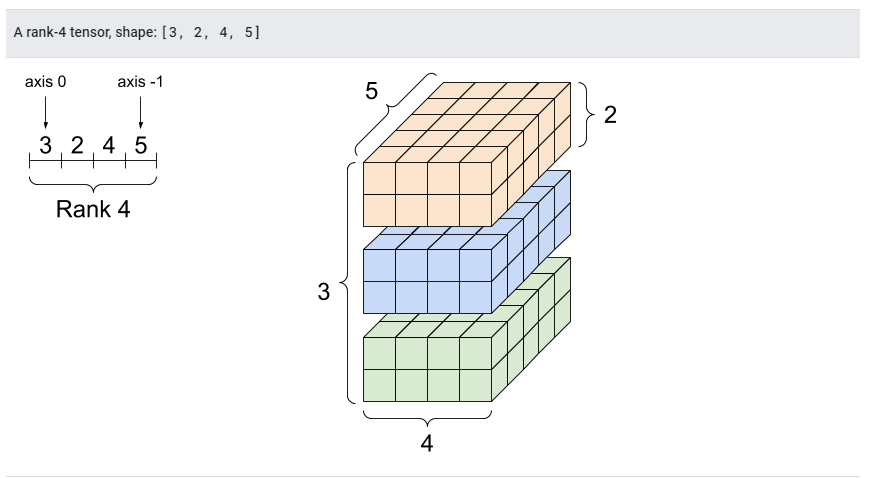

# 2. 차원와 shape 바꾸기

- 차원 늘리기 : unsqueeze()
- 차원 줄이기 : squeeze()
- shpae 바꾸기 : view(), reshape()
- 차원 바꾸기 : transpose(), permute()

In [41]:
? torch.unsqueeze

In [13]:
# unsqueeze(input, dim) / dim(int): the index at which to insert the singleton dimension

x = torch.tensor([[1, 1], [1, 1]])
x = torch.unsqueeze(x, 0) # x = x.unsqueeze(0)
x

tensor([[[1, 1],
         [1, 1]]])

In [14]:
x.dim(), x.shape

(3, torch.Size([1, 2, 2]))

In [15]:
x = torch.rand(3, 10, 10) # e.g. mini-batch로 학습 후, 하나의 이미지를 inference할 때
x = x.unsqueeze(0)
x.shape

torch.Size([1, 3, 10, 10])

In [16]:
x = torch.tensor([[1, 1], [1, 1]])
x = x.unsqueeze(1)
x, x.dim(), x.shape

(tensor([[[1, 1]],
 
         [[1, 1]]]),
 3,
 torch.Size([2, 1, 2]))

In [17]:
# squeeze()

x = x.squeeze()
x, x.ndimension(), x.size()

(tensor([[1, 1],
         [1, 1]]),
 2,
 torch.Size([2, 2]))

In [18]:
# squeeze는 차원 size가 1인 차원을 모두 제거
x = torch.rand(2, 1, 1, 1, 2)
x = x.squeeze()
x.dim(), x.shape

(2, torch.Size([2, 2]))

In [52]:
?torch.Tensor.view

In [19]:
# view(shape)

x = torch.tensor([[1, 1], [1, 1]])
x = x.view(4)
x, x.dim(), x.shape

(tensor([1, 1, 1, 1]), 1, torch.Size([4]))

In [102]:
?torch.Tensor.view

In [20]:
x = x.view(1, 4)
x, x.dim(), x.shape

(tensor([[1, 1, 1, 1]]), 2, torch.Size([1, 4]))

In [54]:
# view 사용 시, element 수와 shape을 잘 맞춰줘야한다.
try:
    x = x.view(3, 1)
except Exception as e:
    print(e)

shape '[3, 1]' is invalid for input of size 4


In [21]:
# reshape()
x = x.reshape(4, 1) # view와 비슷하지만, memory 공유가 보장되지 않는다. contiguous하면 view() 반환 (자세한 내용은 2번째 reference 참고)
x, x.dim(), x.shape

(tensor([[1],
         [1],
         [1],
         [1]]),
 2,
 torch.Size([4, 1]))

In [56]:
?torch.transpose

In [22]:
# transpose(dim0, dim1)

x = torch.rand(16, 32, 32, 3) # batch size, height, width, channel
x = x.transpose(1, 3)
x.shape

torch.Size([16, 3, 32, 32])

In [23]:
x = torch.arange(1, 25).view(2, 3, 4)
x

tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])

In [24]:
x = x.transpose(0, 1)
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [13, 14, 15, 16]],
 
         [[ 5,  6,  7,  8],
          [17, 18, 19, 20]],
 
         [[ 9, 10, 11, 12],
          [21, 22, 23, 24]]]),
 torch.Size([3, 2, 4]))

In [25]:
# permute()

x = x.permute(1, 0, 2) # 0 -> 1, 1 -> 0, 2 -> 2 으로 차원 변경
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8],
          [ 9, 10, 11, 12]],
 
         [[13, 14, 15, 16],
          [17, 18, 19, 20],
          [21, 22, 23, 24]]]),
 torch.Size([2, 3, 4]))

# 3. 텐서의 연산

In [26]:
a = torch.arange(1, 10).view(3, 3).to(dtype=torch.float) # element의 data type이 다르면 행렬곱 등의 연산 시 error
b = torch.ones(3, 3)
a, b

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [27]:
a + 1

tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])

In [28]:
a + torch.tensor([10, 10, 10])

tensor([[11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.]])

In [29]:
a * b

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [30]:
a @ b

tensor([[ 6.,  6.,  6.],
        [15., 15., 15.],
        [24., 24., 24.]])

In [31]:
a.T @ b

tensor([[12., 12., 12.],
        [15., 15., 15.],
        [18., 18., 18.]])

![perceptron](https://blog.kakaocdn.net/dn/bsHiZ5/btqCsGZPBVR/rDvR0OoeTxBpuC1xoWqEo1/img.png)

In [37]:
x = torch.tensor([5., 3.], requires_grad = True)
w = torch.tensor([1., 2.], requires_grad = True)
b = torch.tensor(2., requires_grad = True)

y = sum(x*w) + b

x, w, y

(tensor([5., 3.], requires_grad=True),
 tensor([1., 2.], requires_grad=True),
 tensor(13., grad_fn=<AddBackward0>))

In [38]:
y.backward()
x.grad, w.grad, b.grad

(tensor([1., 2.]), tensor([5., 3.]), tensor(1.))

In [39]:
learning_rate = 0.01
w = w - learning_rate*w.grad
print(w)

tensor([0.9500, 1.9700], grad_fn=<SubBackward0>)


In [40]:
y = sum(x*w) + b
y

tensor(12.6600, grad_fn=<AddBackward0>)

![tensor graph](https://i0.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2018/09/TensorBoard-1st-basic-graph.png?resize=560%2C564&ssl=1)

In [107]:
import unittest
import numpy as np

class Tensor:
    def __init__(self, data):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError(f'{type(data)}은(는) 지원하지 않습니다.')
                
        self.data = data
        self.grad = None
        self.creator = None

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        if self.grad == None:
            self.grad = np.ones_like(self.data)
            print(id(self.grad))

        funcs = [self.creator]

        while funcs:
            f = funcs.pop()
            gys = [output.grad for output in f.outputs]
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = gxs,

            for x, gx in zip(f.inputs, gxs):
                if x.grad == None:
                    x.grad = gx
                else:
                    x.grad = x.grad + gx
                
                if x.creator is not None:
                    funcs.append(x.creator)

def as_array(x):
    return np.array(x) if np.isscalar(x) else x
    
class Function:
    def __call__(self, *inputs):
        xs = [x.data for x in inputs]
        ys = self.forward(*xs)
        if not isinstance(ys, tuple):
            ys = ys,
        outputs = [Tensor(as_array(y)) for y in ys]

        for output in outputs:
            output.set_creator(self)

        self.inputs = inputs
        self.outputs = outputs

        return outputs if len(outputs) > 1 else outputs[0]
    
    def forward(self, x):
        raise NotImplementedError

    def backward(self, gy):
        raise NotImplementedError

class Square(Function):
    def forward(self, x):
        return x ** 2

    def backward(self, gy):
        x = self.inputs[0].data
        gx = 2 * x * gy
        return gx

def square(x):
    return Square()(x)


class Add(Function):
    def forward(self, x0, x1):
        return x0 + x1

    def backward(self, gy):
        return gy, gy

def add(x0, x1):
    return Add()(x0, x1)


x, y = Tensor(np.array(2)), Tensor(np.array(3))
z = add(square(x), square(y))
z.backward()

print(x.grad, y.grad, z.data)

3093745148992
4 6 13



reference
- https://pytorch.org/docs/stable/index.html
- https://subinium.github.io/pytorch-Tensor-Variable/ (텐서 다루기)
- https://statisticsplaybook.tistory.com/6 (텐서 연산)